In [1]:
# imports of all the functions
import torch  # type: ignore
from helpers import *


from visualization import *
import pickle

# Parameter Scan on p and d


Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 1e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###
🔥 TensorBoard launched at http://localhost:6006/


Training Progress: 100%|██████████| 30/30 [02:46<00:00,  5.54s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 1e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###
🔥 TensorBoard launched at http://localhost:6006/


Training Progress: 100%|██████████| 30/30 [02:46<00:00,  5.57s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###
🔥 TensorBoard launched at http://localhost:6006/


Training Progress: 100%|██████████| 30/30 [02:56<00:00,  5.87s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.001, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###
🔥 TensorBoard launched at http://localhost:6006/


Training Progress: 100%|██████████| 30/30 [02:42<00:00,  5.41s/it]


### Experiment 1/1 completed ###
Best parameters for accuracy: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.65372


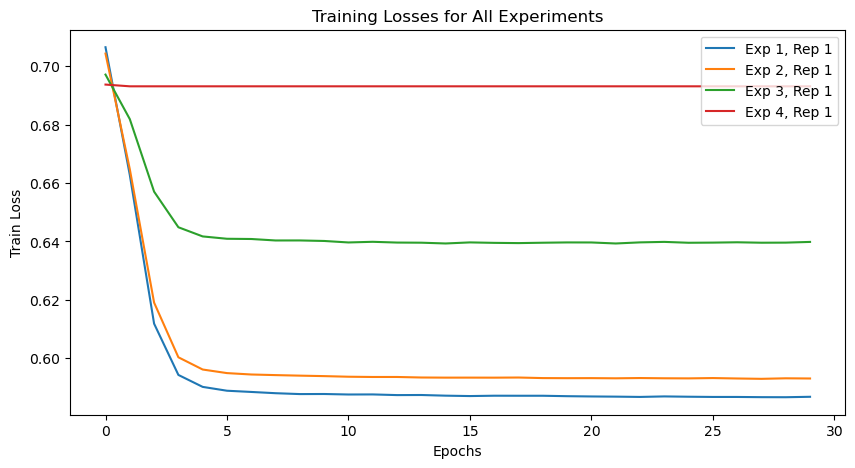

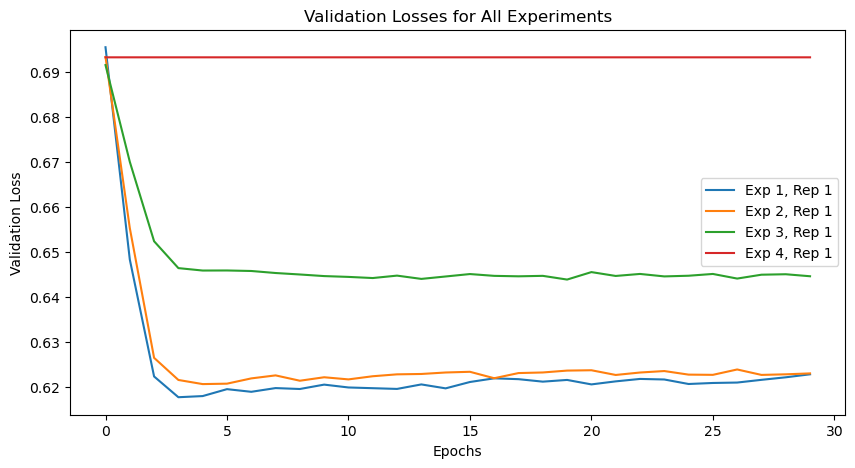

Best learning rate and weight decay: {'n': 1000, 'm': 1000, 'd': 5, 'p': 0.5, 'lr': 0.005, 'weight_decay': 0.0001, 'num_epochs': 30, 'reps': 1, 's': 2.0}


In [2]:
# Fixed hyperparameters
n = m = 1000
num_epochs = 30
reps = 1
s = 2.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Values to scan
p_values = [0.5]
d_values = [5]

# Learning rate and weight decay values to scan
lr_values = [5e-3]
weight_decay_values = [1e-6, 1e-5, 1e-4, 1e-3]

# Run parameter scan for lr and weight decay
results = parameter_scan(n=n, m=m, d=d_values, p=p_values, lr=lr_values, weight_decay=weight_decay_values, num_epochs=num_epochs, reps=reps, s=s, device=device, open_browser=True)

with open("./Data/results_parameter_scan_wd.pkl", "wb") as f:
    pickle.dump(results, f)
# Find best parameters
best_params = get_best_params(results, result_metric='accuracy')

plot_losses(results)

print("Best learning rate and weight decay:", best_params)



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:15<00:00,  1.93it/s]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.2, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:32<00:00,  1.09s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.5, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [01:39<00:00,  3.30s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:25<00:00,  4.85s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [03:12<00:00,  6.41s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 4, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:41<00:00,  1.39s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 4, 'p': 0.2, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [01:18<00:00,  2.61s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 4, 'p': 0.5, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [03:29<00:00,  7.00s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 4, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [05:21<00:00, 10.70s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 4, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [06:34<00:00, 13.14s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 6, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:42<00:00,  1.40s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 6, 'p': 0.2, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [01:23<00:00,  2.77s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 6, 'p': 0.5, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [32:43<00:00, 65.46s/it] 


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 6, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:13<00:00,  4.44s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 6, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:43<00:00,  5.44s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 8, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:15<00:00,  1.90it/s]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 8, 'p': 0.2, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:31<00:00,  1.04s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 8, 'p': 0.5, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [01:19<00:00,  2.65s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 8, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:05<00:00,  4.17s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 8, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:48<00:00,  5.60s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.2, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.5, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [01:19<00:00,  2.66s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.8, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:07<00:00,  4.25s/it]


### Experiment 1/1 completed ###

Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}

### Experiment 1/1 started... ###


Training Progress: 100%|██████████| 30/30 [02:40<00:00,  5.35s/it]


### Experiment 1/1 completed ###


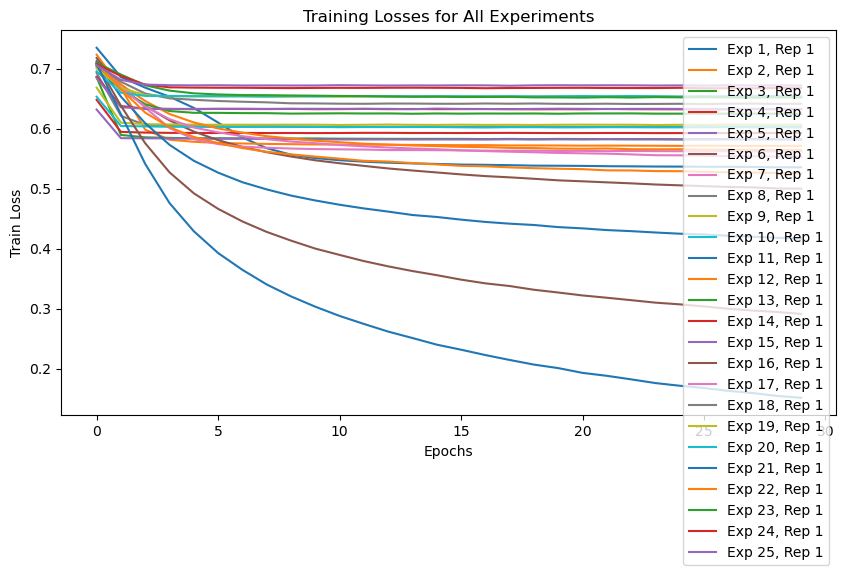

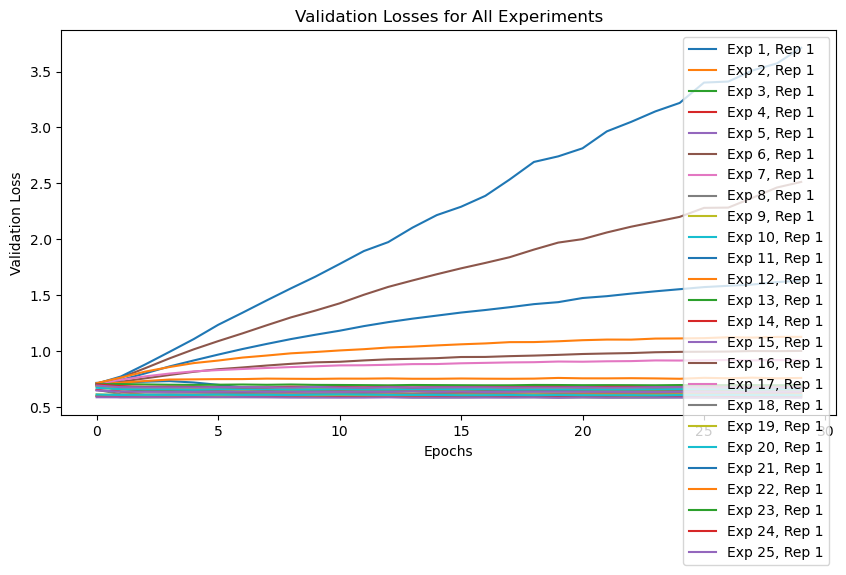

Best configuration found: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}, accuracy: 0.66416


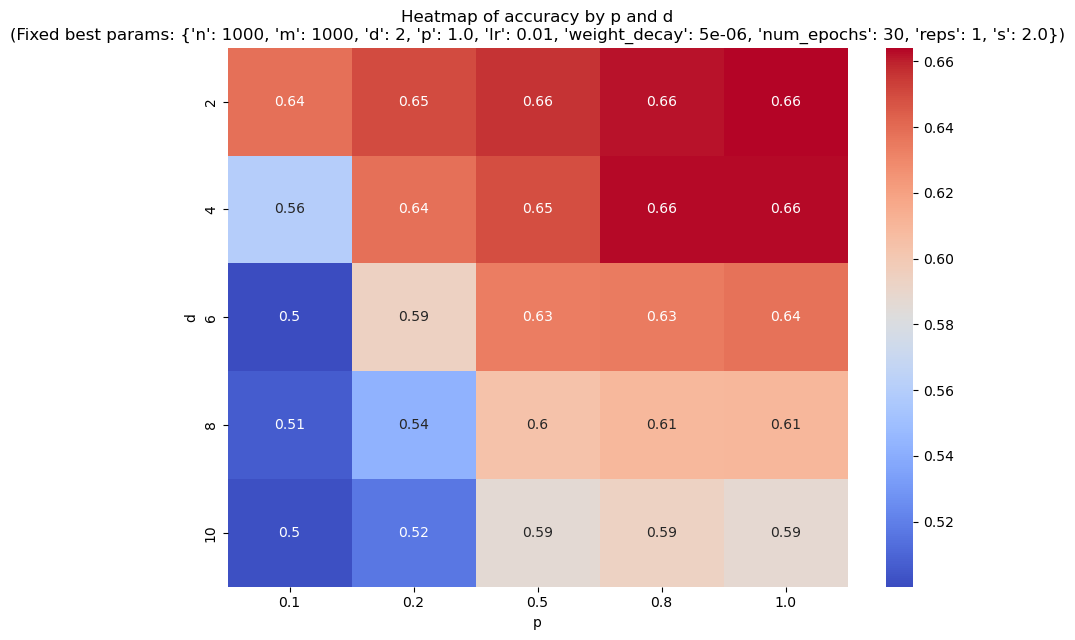

Parameter scan completed and visualizations generated!


In [4]:
# Fixed hyperparameters
n = m = 1000
lr = 1e-2
weight_decay = 5e-6
num_epochs = 30
reps = 1
s = 2.0
reps = 1  # Number of repetitions
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Values to scan
p_values = [0.1, 0.2, 0.5, 0.8, 1.0]
d_values = list(range(2, 11, 2))

# Run parameter scan
results = parameter_scan(
    n=n,
    m=m,
    d=d_values,
    p=p_values,
    lr=lr,
    weight_decay=weight_decay,
    num_epochs=num_epochs,
    reps=reps,
    s=s,
    device=device,
)


# Plot losses
plot_losses(results)

# Plot heatmap for accuracy
plot_heatmap_best_fixed(results, param_x="p", param_y="d", result_metric="accuracy")

print("Parameter scan completed and visualizations generated!")


In [ ]:
# Saving results
with open("Data/results_parameter_scan_p_d.pkl", "wb") as f:
    pickle.dump(results, f)

print("Results saved successfully!")

Results saved successfully!



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.86it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.93it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.90it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.90it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.89it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.85it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.80it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.76it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.70it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.60it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.56it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.68it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.59it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:20<00:00,  1.46it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:16<00:00,  1.77it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:15<00:00,  1.99it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.62it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.73it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.55it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.82it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.84it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.84it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.86it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.69it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.84it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.87it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.87it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.75it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.67it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:11<00:00,  2.65it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.86it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.88it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.83it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.96it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.91it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.95it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.94it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.97it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.95it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:10<00:00,  2.93it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:44<00:00,  3.50s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:46<00:00,  3.56s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:43<00:00,  3.44s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:43<00:00,  3.44s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [01:45<00:00,  3.52s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:53<00:00,  5.78s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:01<00:00,  6.05s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:52<00:00,  5.77s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:52<00:00,  5.75s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:52<00:00,  5.76s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [06:26<00:00, 12.87s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [06:09<00:00, 12.30s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [06:09<00:00, 12.31s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [06:21<00:00, 12.70s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:35<00:00,  7.19s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:30<00:00,  7.03s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:30<00:00,  7.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:19<00:00,  6.64s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:57<00:00,  5.91s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:54<00:00,  5.81s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:52<00:00,  5.74s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:35<00:00,  5.18s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:37<00:00,  5.23s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:37<00:00,  5.25s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:43<00:00,  5.44s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:07<00:00,  6.26s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:39<00:00,  5.32s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:33<00:00,  5.13s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:34<00:00,  5.15s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:38<00:00,  5.30s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:37<00:00,  5.25s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:39<00:00,  5.32s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:34<00:00,  5.14s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:36<00:00,  5.23s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:36<00:00,  5.20s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:01<00:00,  6.07s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:35<00:00,  5.17s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:31<00:00,  5.05s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:44<00:00,  5.47s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:55<00:00,  5.84s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:32<00:00,  1.08s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.03it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:26<00:00,  1.14it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.03s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.00s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:27<00:00,  1.07it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:31<00:00,  1.06s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.01, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:27<00:00,  1.08it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:25<00:00,  1.19it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:27<00:00,  1.09it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:27<00:00,  1.11it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.03it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.01it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.03it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:35<00:00,  1.17s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.005, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:34<00:00,  1.15s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:28<00:00,  1.04it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:28<00:00,  1.06it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:26<00:00,  1.12it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.01s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:32<00:00,  1.10s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:36<00:00,  1.22s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:36<00:00,  1.23s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:34<00:00,  1.16s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.01s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.01it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:29<00:00,  1.02it/s]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:33<00:00,  1.12s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:35<00:00,  1.18s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:30<00:00,  1.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 0.1, 'lr': 0.0001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [00:32<00:00,  1.07s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [05:05<00:00, 10.18s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [05:00<00:00, 10.01s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [05:00<00:00, 10.02s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:44<00:00,  9.50s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:57<00:00,  9.93s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [06:05<00:00, 12.18s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:51<00:00,  9.72s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:37<00:00,  9.25s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:43<00:00,  9.46s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.01, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:48<00:00,  5.61s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:35<00:00,  7.20s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:55<00:00,  7.86s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:52<00:00,  7.76s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:55<00:00,  7.86s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:53<00:00,  7.78s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:54<00:00,  7.80s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:56<00:00,  7.87s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:02<00:00,  8.08s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:06<00:00,  8.20s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.005, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:07<00:00,  8.24s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:54<00:00,  7.81s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:55<00:00,  7.83s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:51<00:00,  7.73s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:56<00:00,  7.89s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:26<00:00,  6.90s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:54<00:00,  7.81s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:05<00:00,  8.18s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [04:11<00:00,  8.37s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:30<00:00,  7.00s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:54<00:00,  5.80s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 9.999999974752427e-07, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:34<00:00,  7.14s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 2.782559477054747e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:06<00:00,  6.23s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 7.742636626062449e-06, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:58<00:00,  5.96s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 2.1544346964219585e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:57<00:00,  5.91s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:52<00:00,  5.76s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.00016681005945429206, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:48<00:00,  5.62s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.00046415888937190175, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:53<00:00,  5.77s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.0012915496481582522, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:55<00:00,  5.84s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.0035938136279582977, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [03:02<00:00,  6.10s/it]



Running experiment with parameters: {'n': 1000, 'm': 1000, 'd': 10, 'p': 1.0, 'lr': 0.0001, 'weight_decay': 0.009999999776482582, 'num_epochs': 30, 'reps': 1, 's': 2.0}


Training Progress: 100%|██████████| 30/30 [02:50<00:00,  5.67s/it]


Results saved successfully!
Best parameters for accuracy: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}, Best value: 0.67722
Best hyperparameters found: {'n': 1000, 'm': 1000, 'd': 2, 'p': 1.0, 'lr': 0.005, 'weight_decay': 5.994842649670318e-05, 'num_epochs': 30, 'reps': 1, 's': 2.0}


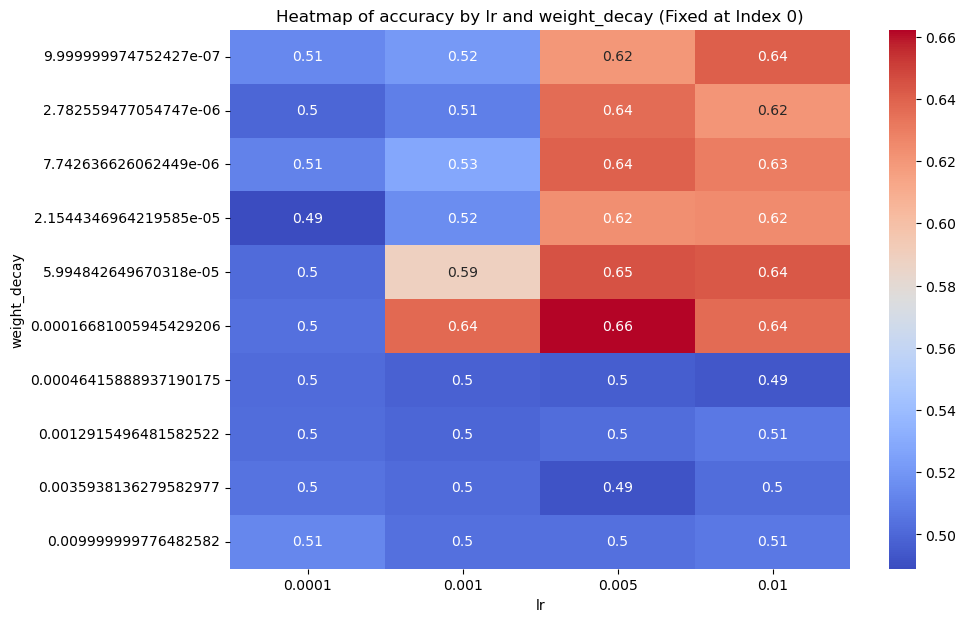

In [ ]:

# Fixed hyperparameters
n = m = 1000
num_epochs = 30
reps = 1
s = 2.0
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Values to scan
d_values = [2, 10]
p_values = [0.1, 1.0]
lr_values = [1e-2, 5e-3, 1e-3, 1e-4]  # 4 valeurs entre 1e-2 et 1e-4
weight_decay_values = torch.logspace(-6, -2, steps=10).tolist()  # 10 valeurs entre 1e-6 et 1e-2

# Run parameter scan
results = parameter_scan(
    n=n, m=m, d=d_values, p=p_values, lr=lr_values, weight_decay=weight_decay_values,
    num_epochs=num_epochs, reps=reps, s=s, device=device
)

# Sauvegarde des résultats pour utilisation future
with open("Data/results_hyperparam_scan_lr_wd.pkl", "wb") as f:
    pickle.dump(results, f)
print("Results saved successfully!")

# Trouver la meilleure combinaison de paramètres basée sur l'accuracy
best_params = get_best_params(results, result_metric="accuracy")
# print("Best hyperparameters found:", best_params)

# Visualisation des résultats
plot_heatmap_fixed(results, param_x="lr", param_y="weight_decay", result_metric="accuracy", fixed_index=0)


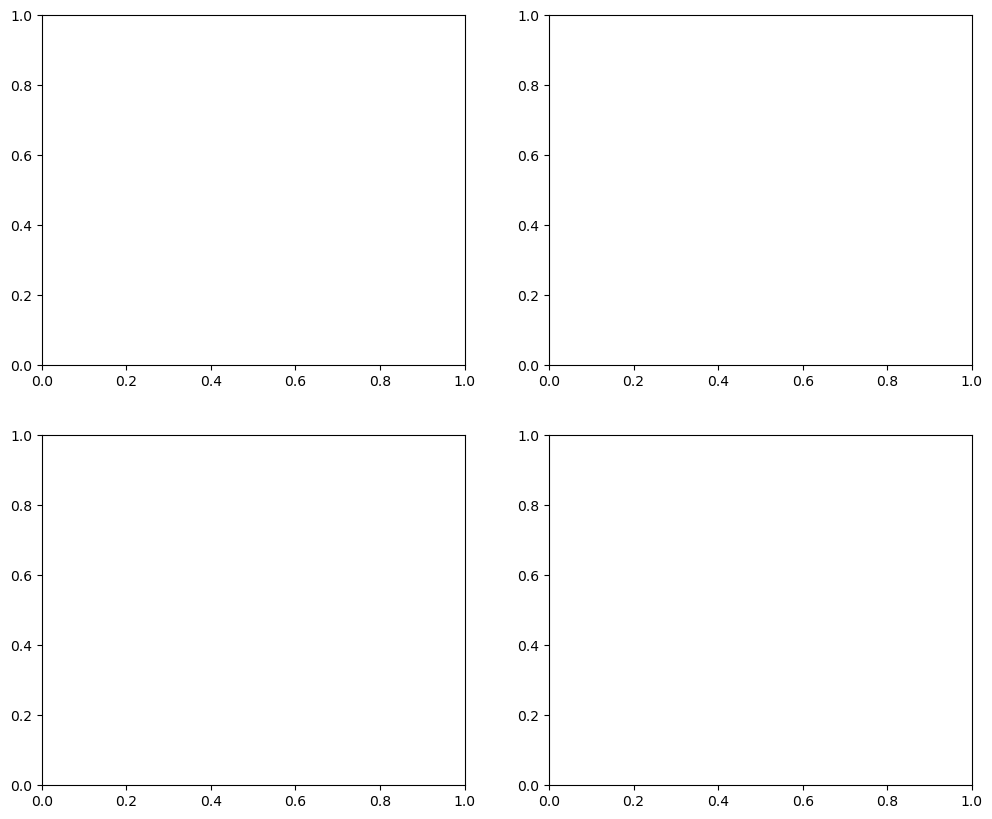

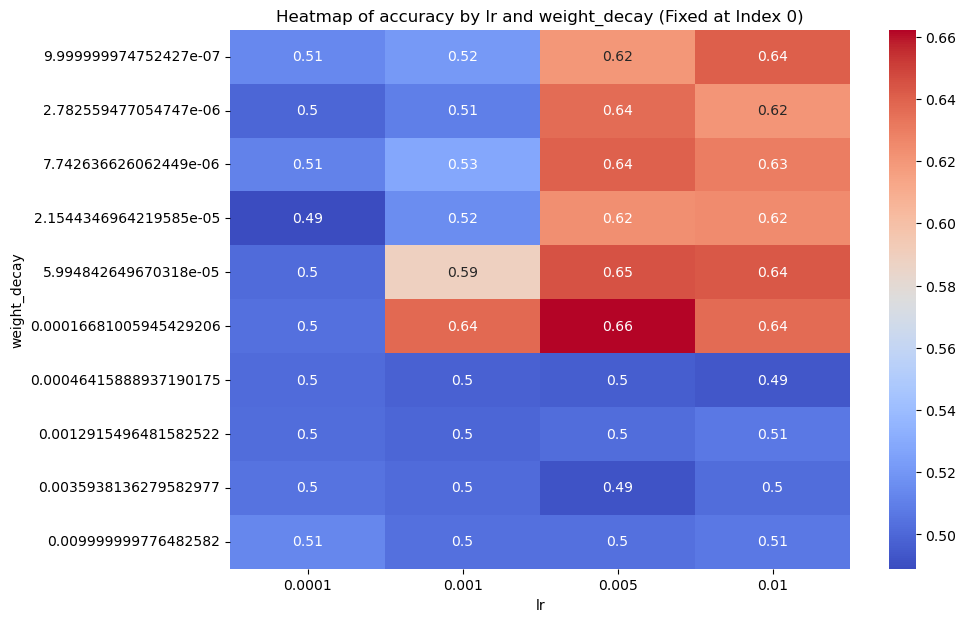

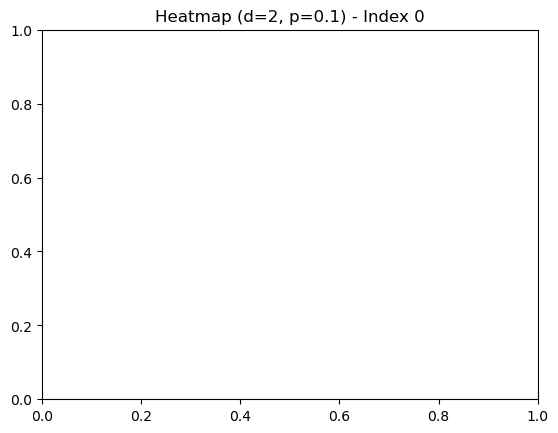

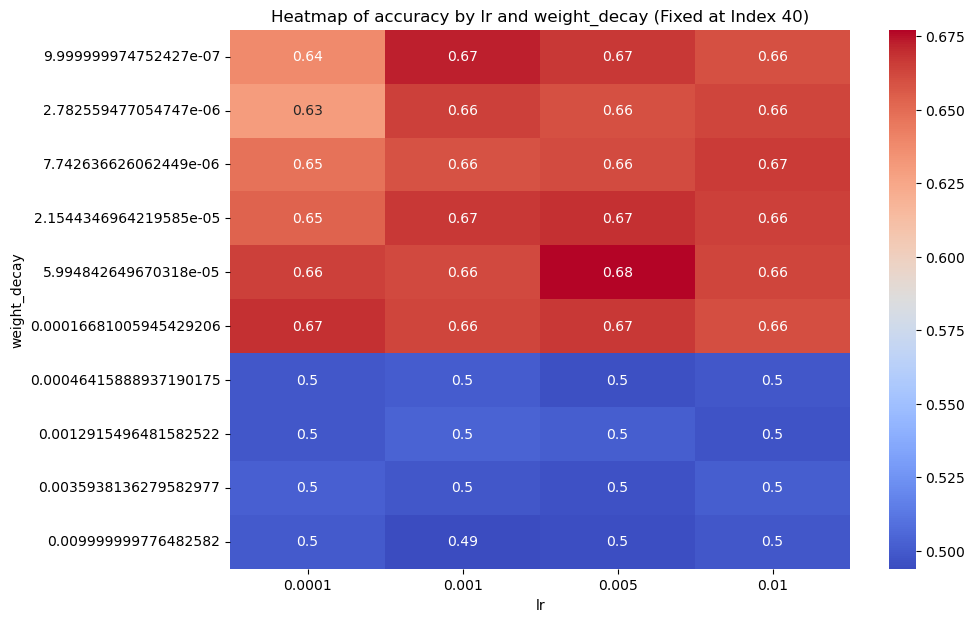

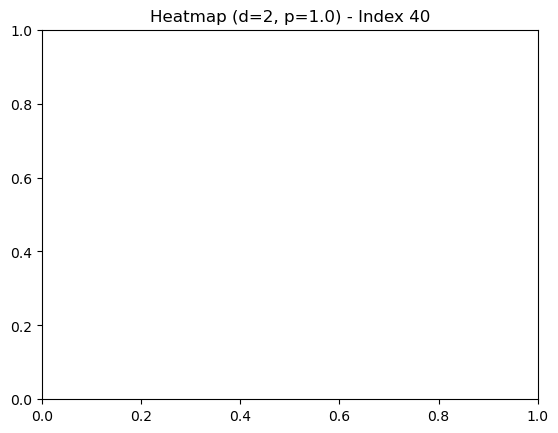

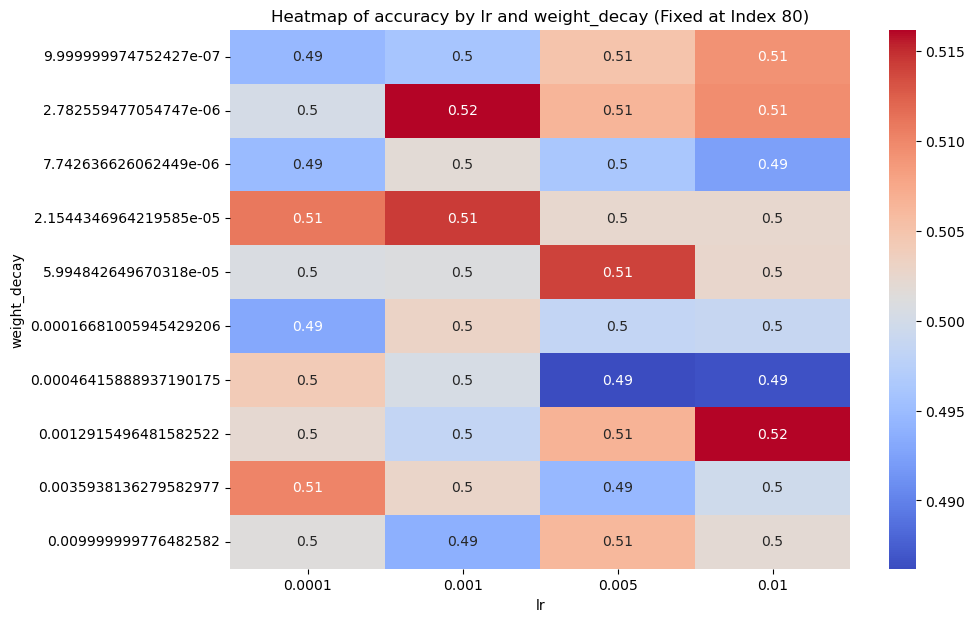

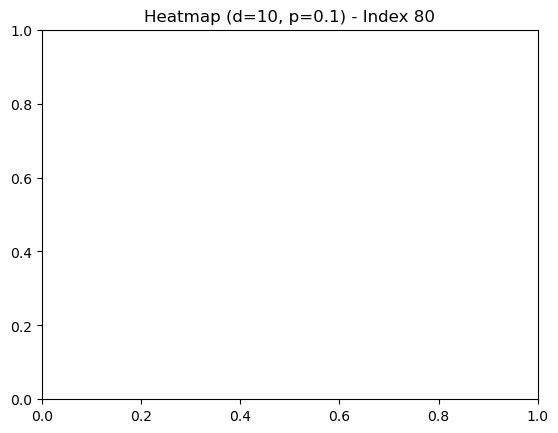

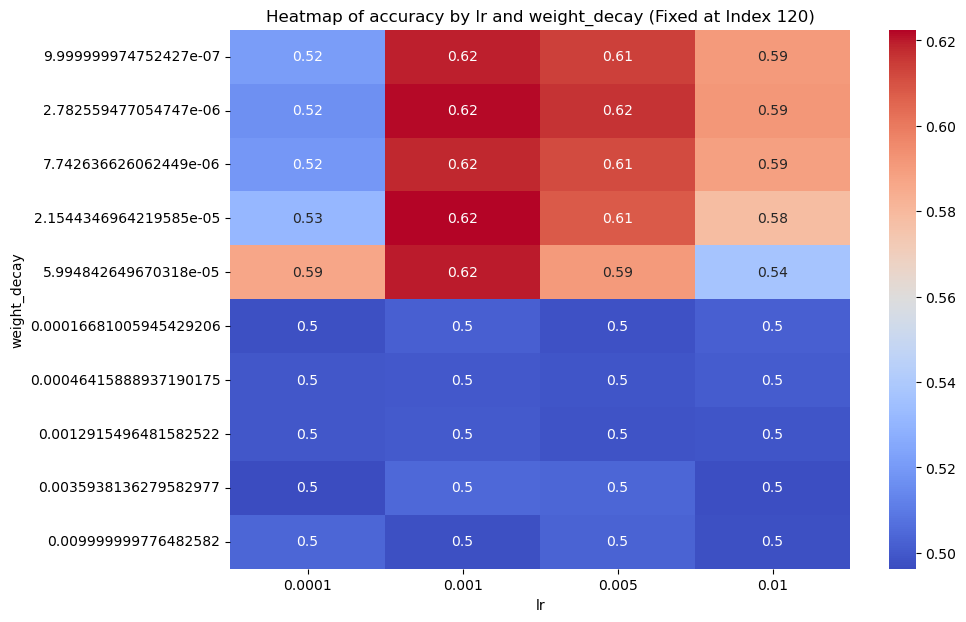

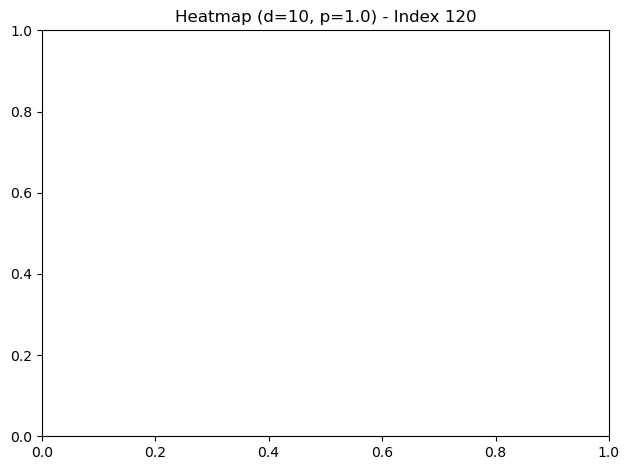

In [ ]:
import matplotlib.pyplot as plt
from visualization import plot_heatmap_fixed
# Define the values of d and p to scan
d_values = [2, 10]
p_values = [0.1, 1.0]

# Create a figure with 2x2 subplots to display all 4 heatmaps
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# Iterate over all (d, p) combinations to find the first index for each
for i, d in enumerate(d_values):
    for j, p in enumerate(p_values):
        # Find the first index in results where d and p match
        fixed_index = next((idx for idx, exp in enumerate(results) if exp["params"]["d"] == d and exp["params"]["p"] == p), None)

        # Check if a valid index was found
        if fixed_index is None:
            print(f"No results found for d={d}, p={p}")
            continue

        # Plot the heatmap using the correct subplot
        ax = axes[i, j]

        # Plot the heatmap using the identified fixed_index
        plot_heatmap_fixed(results, param_x="lr", param_y="weight_decay", result_metric="accuracy", fixed_index=fixed_index, ax = ax)
        plt.title(f"Heatmap (d={d}, p={p}) - Index {fixed_index}")

# Adjust layout to avoid overlapping elements
plt.tight_layout()
plt.show()


In [ ]:
# Chargement des résultats
# with open("Data/results.pkl", "rb") as f:
#     loaded_results = pickle.load(f)

# print("Results loaded successfully!")